In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [2]:
df  =pd.read_excel('E:/Docs/Data/England_Premier-League_2022-2023_Tottenham_vs_Manchester United.xlsx')

In [3]:
df = df.loc[(df['team']=='Manchester United') & (df['type']=='Pass')]

In [4]:
df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,48.1,0.0,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023
1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,85.0,0.0,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023
2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,93.2,0.0,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023
4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,94.4,0.0,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023
5,0,10.0,a,24.9,91.8,Pass,Successful,Diogo Dalot,33.2,67.6,0.0,0.002645,20,DL,Manchester United,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,93,45.0,a,83.4,13.5,Pass,Successful,Diogo Dalot,74.4,38.3,0.0,-0.006066,20,DL,Manchester United,England,Premier-League,2022-2023
1938,93,46.0,a,73.7,39.2,Pass,Successful,Fred,75.1,68.5,0.0,-0.000629,17,Sub,Manchester United,England,Premier-League,2022-2023
1940,93,47.0,a,79.1,77.8,Pass,Successful,Marcus Rashford,74.5,82.1,0.0,-0.002902,10,FW,Manchester United,England,Premier-League,2022-2023
1941,93,47.0,a,75.1,72.4,Pass,Successful,Luke Shaw,79.9,73.8,0.0,0.004408,23,DC,Manchester United,England,Premier-League,2022-2023


In [5]:
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40-df['y']))
df['ending'] = np.sqrt(np.square(120-df['endX']) + np.square(40-df['endY']))

In [6]:
df =df.reset_index()
df['progressive'] = [(df['ending'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]
df

,index,minute,second,h_a,x,y,type,outcomeType,playerName,endX,...,xT,shirtNo,position,team,country,competition,season,beginning,ending,progressive
0,0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,...,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023,70.569824,83.593361,False
1,1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,...,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023,83.997381,101.697788,False
2,2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,...,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023,101.302764,97.242995,False
3,4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,...,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023,100.837741,109.126166,False
4,5,0,10.0,a,24.9,91.8,Pass,Successful,Diogo Dalot,33.2,...,0.002645,20,DL,Manchester United,England,Premier-League,2022-2023,108.292428,91.082380,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,1937,93,45.0,a,83.4,13.5,Pass,Successful,Diogo Dalot,74.4,...,-0.006066,20,DL,Manchester United,England,Premier-League,2022-2023,45.186392,45.631678,False
627,1938,93,46.0,a,73.7,39.2,Pass,Successful,Fred,75.1,...,-0.000629,17,Sub,Manchester United,England,Premier-League,2022-2023,46.306911,53.181388,False
628,1940,93,47.0,a,79.1,77.8,Pass,Successful,Marcus Rashford,74.5,...,-0.002902,10,FW,Manchester United,England,Premier-League,2022-2023,55.692459,61.989193,False
629,1941,93,47.0,a,75.1,72.4,Pass,Successful,Luke Shaw,79.9,...,0.004408,23,DC,Manchester United,England,Premier-League,2022-2023,55.369396,52.444733,False


In [7]:
df = df.loc[df['progressive']==True]
df.head(25)

,index,minute,second,h_a,x,y,type,outcomeType,playerName,endX,...,xT,shirtNo,position,team,country,competition,season,beginning,ending,progressive
10,18,0,34.0,a,41.4,73.9,Pass,Successful,Christian Eriksen,59.5,...,0.005499,14,DMC,Manchester United,England,Premier-League,2022-2023,85.598890,63.910954,True
19,42,1,27.0,a,9.4,44.5,Pass,Unsuccessful,David de Gea,45.8,...,NaN,1,GK,Manchester United,England,Premier-League,2022-2023,110.691508,80.223999,True
35,73,2,35.0,a,82.8,81.2,Pass,Unsuccessful,Jadon Sancho,84.7,...,NaN,25,AML,Manchester United,England,Premier-League,2022-2023,55.509279,36.800136,True
43,107,4,13.0,a,54.4,72.1,Pass,Successful,Marcus Rashford,74.0,...,0.007908,10,FW,Manchester United,England,Premier-League,2022-2023,73.032664,54.325040,True
61,159,6,4.0,a,47.1,31.5,Pass,Successful,Victor Lindelöf,67.7,...,0.007678,2,DC,Manchester United,England,Premier-League,2022-2023,73.393869,52.548073,True
73,189,8,34.0,a,59.3,4.1,Pass,Unsuccessful,Antony,75.9,...,NaN,21,AMR,Manchester United,England,Premier-League,2022-2023,70.521628,47.335505,True
78,212,10,5.0,a,7.3,46.1,Pass,Unsuccessful,David de Gea,56.1,...,NaN,1,GK,Manchester United,England,Premier-League,2022-2023,112.864964,65.394342,True
98,248,11,2.0,a,43.6,66.1,Pass,Unsuccessful,Luke Shaw,77.4,...,NaN,23,DC,Manchester United,England,Premier-League,2022-2023,80.735184,49.907514,True
104,269,13,16.0,a,55.1,84.4,Pass,Successful,Diogo Dalot,64.8,...,0.004916,20,DL,Manchester United,England,Premier-League,2022-2023,78.634407,58.411043,True
107,274,13,27.0,a,64.9,28.3,Pass,Unsuccessful,Casemiro,88.9,...,NaN,18,DMC,Manchester United,England,Premier-League,2022-2023,56.328501,32.015153,True


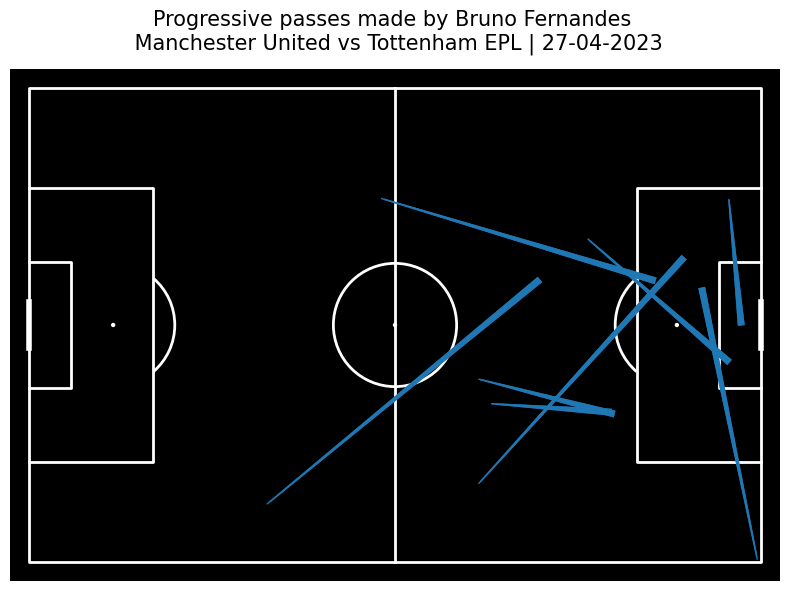

In [11]:
df8 = df.loc[df['shirtNo']==8]
pitch = Pitch(pitch_type='opta',pitch_color='black',line_color='w',line_zorder=1)
fig,ax= pitch.draw(figsize=(8,13))

pitch.lines(df8.x,df8.y,df8.endX,df8.endY,comet=True,ax=ax)
fig.suptitle(y=0.72,t='Progressive passes made by Bruno Fernandes \n Manchester United vs Tottenham EPL | 27-04-2023',color='black',fontsize=15)
plt.show()

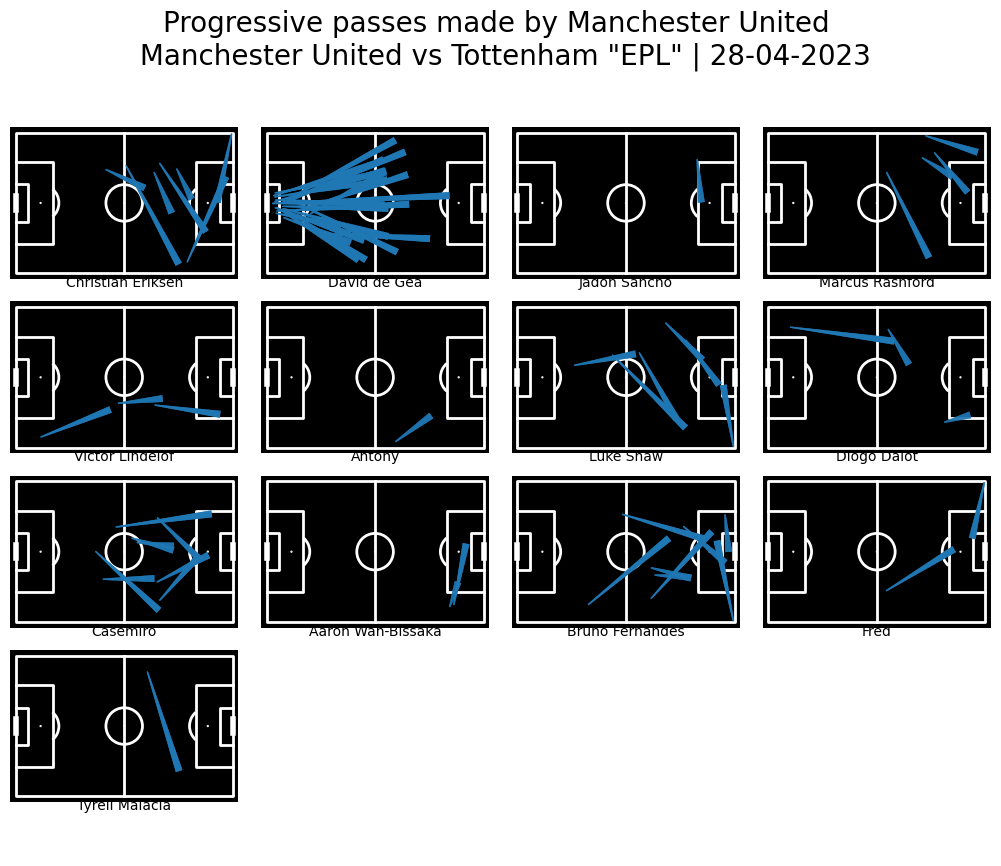

In [27]:
pitch = Pitch(pitch_type='opta',pitch_color='black',line_color='w',line_zorder=1)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.75, title_height=0.06, axis=False,
                            space=0.1,endnote_height=0.05, title_space=0.03, endnote_space=0.01)
names = df['playerName'].unique()
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(50, -7, name,
            ha='center', va='center', fontsize=10)
    player_df = df.loc[df["playerName"] == name]
    pitch.lines(player_df.x,player_df.y,player_df.endX,player_df.endY,comet=True,ax=ax)
for ax in axs['pitch'][-1, 14 - len(names):]:
    ax.remove()
    
fig.suptitle(y=0.99,t='Progressive passes made by Manchester United \n Manchester United vs Tottenham "EPL" | 28-04-2023',color='black',fontsize=20)
plt.show()